# Credit Scoring Model

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This assignment requires students to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this assignment is to build a model that borrowers can use to help make the best financial decisions.

Logitic Regression Model has been used for this project.

# Content

* #### 1. Problem Definition
* #### 2. Loading the Packages and Data
   * 2.1. Load Packages 
   * 2.2. Load Dataset
* #### 3. Data Preparation
   * 3.1. Fill the NA with median for both train & test dataset
   * 3.2. SeriousDlqin2yrs (or Target y) Distribution
   * 3.3. Detect & Drop Outliers from train dataset
   * 3.4. Merge Dataset
* #### 4. Exploratory Data Analysis
   * 4.1. Data Transformation (1) & Data Visualization
   * 4.2. Descriptive Statistics 
   * 4.3. Data Transformation (2): Building binary/dummy variables
* #### 5. Finalize Model
   * 5.1. Train/Test Split
   * 5.2. Set & Fit the Model
   * 5.3. Feature Selection 
   * 5.4. Use the Model to Make Predictions 
      * 5.4.1. Generation of y_predict (SeriousDlqin2yrs or Target)
      * 5.4.2. Generation of Default Probability
   * 5.5. Output the Data (File to Turn-in)


# 1. Problem Definition

#### id (Type: integer)
Row Identifier 

#### Dependent: SeriousDlqin2yrs (Type: Y/N)
Person experienced 90 days past due delinquency or worse.


### Features [10]:

#### 1. Revolving Utilization Of Unsecured Lines (Type: percentage)
Total balance on credit cards and personal lines of credit except real estate and
no installment debt like carloans divided by the sum of credit limits.
#### 2. age (Type: integer)
Age of borrower in years
#### 3. Number Of Time 30-59 Days Past Due Not Worse (Type: integer)
Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
#### 4. Debt Ratio (Type: percentage)
Monthly debt payments, alimony,living costs divided by monthy gross income.
#### 5. Monthly Income (Type: real)
Monthly Income.
#### 6. Number Of Open Credit Lines And Loans (Type: integer)
Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
#### 7. Number Of Times 90 Days Late (Type: integer)
Number of times borrower has been 90 days or more past due.
#### 8. Number Real Estate Loans Or Lines (Type: integer)
Number of mortgage and real estate loans including home equity lines of credit.
#### 9. Number Of Time 60-89 Days Past Due Not Worse (Type: integer)
Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
#### 10. Number Of Dependents (Type: integer)
Number of dependents in family excluding themselves (spouse, children etc.)

# 2. Loading the Packages and Data

## 2.1. Load Packages

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from collections import Counter

#Function and Modules for the Logistic Regression
from sklearn.linear_model import LogisticRegression

## 2.2. Load Dataset 

In [2]:
train = pd.read_csv("ConsumerCred-train.csv")
test = pd.read_csv("2ConsumerCred-test.csv")

In [3]:
train.head()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
train.describe()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000,9.016900e+04,112500.000000,112500.000000,112500.000000,112500.000000,109509.000000
mean,56250.500000,0.067227,5.875869,52.318018,0.422809,350.538451,6.651952e+03,8.463840,0.268124,1.019520,0.243120,0.758458
std,32476.096979,0.250415,216.049516,14.769059,4.225422,1536.092601,1.114783e+04,5.150094,4.202573,1.133609,4.188614,1.115585
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28125.750000,0.000000,0.030293,41.000000,0.000000,0.174611,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,56250.500000,0.000000,0.153932,52.000000,0.000000,0.366913,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,84375.250000,0.000000,0.558363,63.000000,0.000000,0.872048,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,112500.000000,1.000000,29110.000000,109.000000,98.000000,220516.000000,1.794060e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [5]:
train.isnull().sum()

id                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           22331
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2991
dtype: int64

In [6]:
test.isnull().sum()

id                                          0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

# 3. Data Preparation

## 3.1. Fill the NA with median for both train & test dataset

By code ".isnull().sum()", we have found out both "MonthlyIncome" and "NumberOfDependents" have some "NA" in both train and test raw data. Therefore, we fill these "NA" with the corresponding median number. 

In [7]:
#Fill the NA with median for both train & test dataset
train.MonthlyIncome = train.MonthlyIncome.fillna(train.MonthlyIncome.median())
train.NumberOfDependents = train.NumberOfDependents.fillna(train.NumberOfDependents.median())

test.MonthlyIncome = train.MonthlyIncome.fillna(train.MonthlyIncome.median())
test.NumberOfDependents = train.NumberOfDependents.fillna(train.NumberOfDependents.median())

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112500 entries, 0 to 112499
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    112500 non-null  int64  
 1   SeriousDlqin2yrs                      112500 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  112500 non-null  float64
 3   age                                   112500 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  112500 non-null  int64  
 5   DebtRatio                             112500 non-null  float64
 6   MonthlyIncome                         112500 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       112500 non-null  int64  
 8   NumberOfTimes90DaysLate               112500 non-null  int64  
 9   NumberRealEstateLoansOrLines          112500 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  112500 non-null  int64  
 11  

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         112500 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    112500 non-null  float64
dtype

## 3.2. SeriousDlqin2yrs (or Target y) Distribution

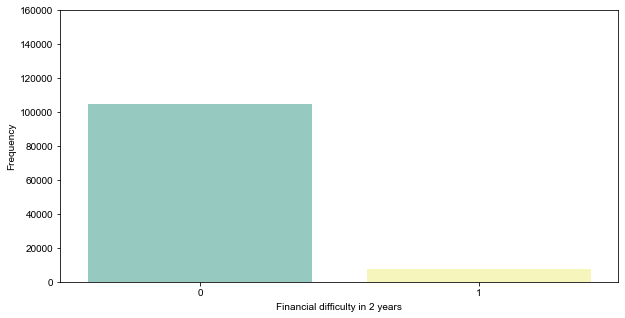

In [10]:
ax = sns.countplot(x = train.SeriousDlqin2yrs ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel('Financial difficulty in 2 years')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

## 3.3. Detect & Drop Outliers from train dataset

In [11]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
# These are the numerical features present in the dataset
Outliers_to_drop_train = detect_outliers(train,2,["id",
                                            "RevolvingUtilizationOfUnsecuredLines",
                                            "age",
                                            "NumberOfTime30-59DaysPastDueNotWorse",
                                            "DebtRatio",
                                            "MonthlyIncome",
                                            "NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate",
                                            "NumberRealEstateLoansOrLines",
                                            "NumberOfTime60-89DaysPastDueNotWorse",
                                            "NumberOfDependents"])

In [12]:
train.loc[Outliers_to_drop_train] #Number of Outliers are needed to be dropped out of train dataset

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
659,660,0,2.258964,33,2,0.032484,2000.0,1,1,0,0,2.0
671,672,1,1.362142,73,1,274.000000,5400.0,2,3,0,1,0.0
3557,3558,0,3746.000000,52,2,0.481353,2600.0,5,0,1,0,3.0
3598,3599,0,1.566866,46,2,0.104983,6000.0,3,2,0,0,0.0
4436,4437,0,2.237856,60,6,2597.000000,1.0,16,1,2,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
105057,105058,0,0.786839,32,0,0.071437,9000.0,6,2,0,1,4.0
106149,106150,1,0.837581,56,0,0.057221,1100.0,2,2,0,1,3.0
106748,106749,1,0.859714,55,0,0.599348,11046.0,18,7,6,6,1.0
107923,107924,1,1.000000,38,0,0.250573,5666.0,4,2,1,1,3.0


In [13]:
#Drop the Outliers
train = train.drop(Outliers_to_drop_train, axis = 0).reset_index(drop=True)

## 3.4. Merge Dataset

In [14]:
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [15]:
dataset.shape

(258640, 12)

In [16]:
dataset #Dataset with old names

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
258635,149996,NaN,0.917635,52,2,0.259496,NaN,4,0,0,0,NaN
258636,149997,NaN,0.224711,55,0,0.057235,NaN,7,0,0,0,NaN
258637,149998,NaN,0.954409,26,0,0.324962,NaN,4,0,0,0,NaN
258638,149999,NaN,0.385742,50,0,0.404293,NaN,7,0,0,0,NaN


Rename the column in a shorter term.

In [17]:
dataset = dataset.rename(columns={'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

train = train.rename(columns={'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

test = test.rename(columns={'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

In [18]:
dataset #Dataset with new names

,id,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late6089,Deps
0,1,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
258635,149996,NaN,0.917635,52,2,0.259496,NaN,4,0,0,0,NaN
258636,149997,NaN,0.224711,55,0,0.057235,NaN,7,0,0,0,NaN
258637,149998,NaN,0.954409,26,0,0.324962,NaN,4,0,0,0,NaN
258638,149999,NaN,0.385742,50,0,0.404293,NaN,7,0,0,0,NaN


# 4. Exploratory Data Analysis

## 4.1. Data Transformation (1) & Data Visualization

Discretize each column of the "dataset" DataFrame into # binds based on the distribution of the data or specific situation.
This will effectively transform the continuous "Input" variable into a categorical one with several levels.

1. UnsecLines

In [19]:
#UnsecLines
dataset.UnsecLines = pd.qcut(dataset.UnsecLines.values, 5).codes

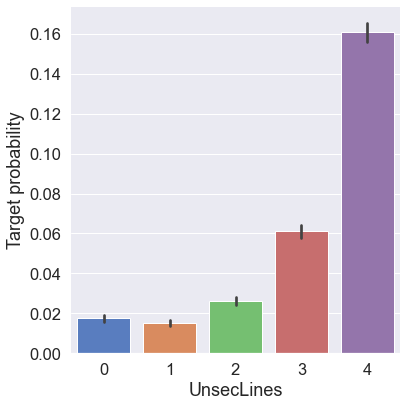

In [20]:
# Explore UnsecLines feature vs Target
g = sns.catplot(x="UnsecLines", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

2. age

In [21]:
#age
dataset.age = pd.qcut(dataset.age.values, 5).codes

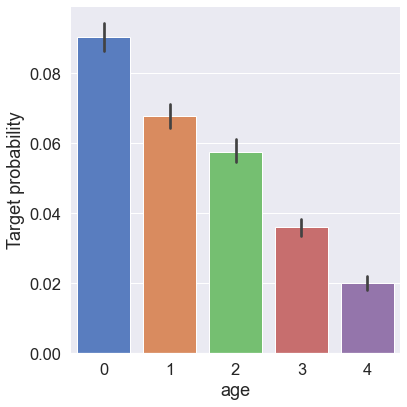

In [22]:
# Explore age feature quantiles vs Target
g = sns.catplot(x="age", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

3. Late3059

In [23]:
#Late3059
for i in range(len(dataset)):
    if dataset.Late3059[i] >= 6:
        dataset.Late3059[i] = 6

C:\Users\gfan1\AppData\Local\Temp\ipykernel_22224\3878552743.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Late3059[i] = 6


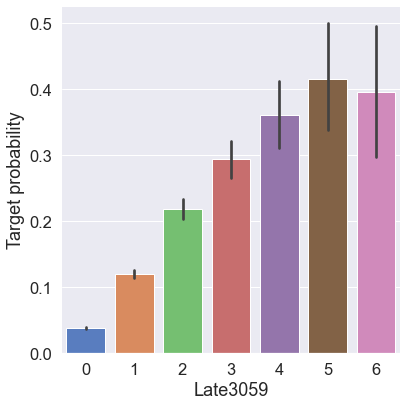

In [24]:
# Explore Late3059 feature vs Target
g = sns.catplot(x="Late3059", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

4. DebtRatio

In [25]:
#DebtRatio
dataset.DebtRatio = pd.qcut(dataset.DebtRatio.values, 5).codes

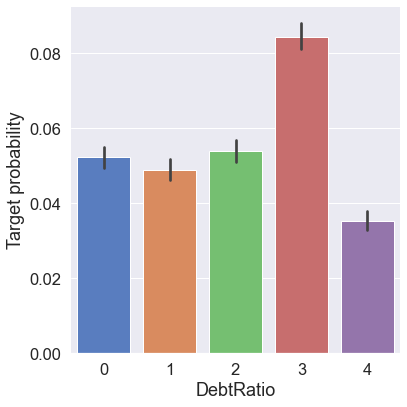

In [26]:
# Explore DebtRatio feature quantiles vs Target
g = sns.catplot(x="DebtRatio", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

5. Monthly Income

In [27]:
#MonthlyIncome
dataset.MonthlyIncome = pd.qcut(dataset.MonthlyIncome.values, 5).codes

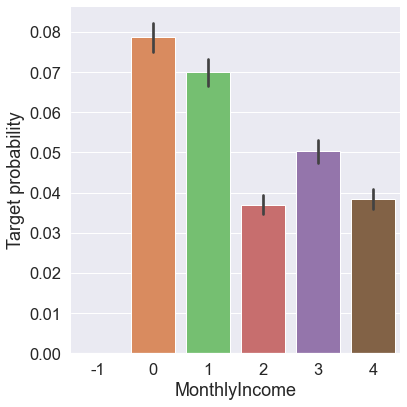

In [28]:
# Explore MonthlyIncome feature quantiles vs Target
g = sns.catplot(x="MonthlyIncome", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

6. OpenCredit

In [29]:
#OpenCredit
dataset.OpenCredit = pd.qcut(dataset.OpenCredit.values, 5).codes

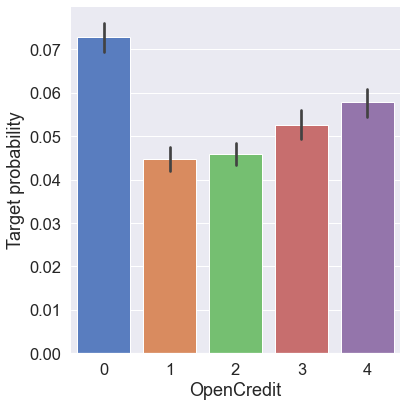

In [30]:
# Explore OpenCredit feature quantiles vs Target
g = sns.catplot(x="OpenCredit", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

7. Late90

In [31]:
#Late90
for i in range(len(dataset)):
    if dataset.Late90[i] >= 5:
        dataset.Late90[i] = 5

C:\Users\gfan1\AppData\Local\Temp\ipykernel_22224\1468732869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Late90[i] = 5


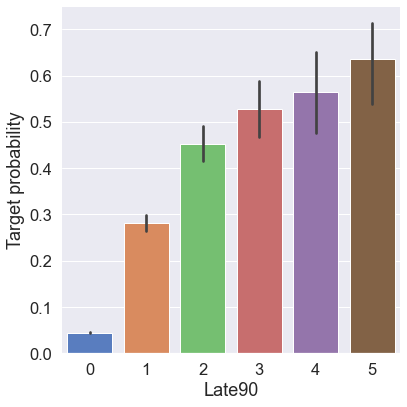

In [32]:
# Explore Late90 feature quantiles vs Target
g = sns.catplot(x="Late90", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

8. PropLines

In [33]:
#PropLines
for i in range(len(dataset)):
    if dataset.PropLines[i] >= 6:
        dataset.PropLines[i] = 6

C:\Users\gfan1\AppData\Local\Temp\ipykernel_22224\2709593867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.PropLines[i] = 6


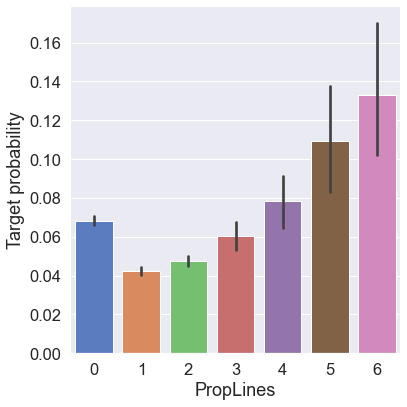

In [34]:
# Explore PropLines feature quantiles vs Target
g = sns.catplot(x="PropLines", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

9. Late6089

In [35]:
#Late6089
for i in range(len(dataset)):
    if dataset.Late6089[i] >= 3:
        dataset.Late6089[i] = 3

C:\Users\gfan1\AppData\Local\Temp\ipykernel_22224\2809365270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Late6089[i] = 3


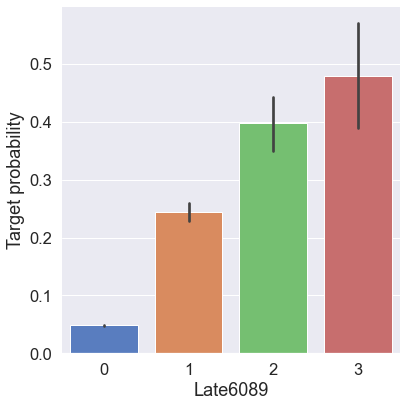

In [36]:
# Explore Late6089 feature quantiles vs Target
g = sns.catplot(x="Late6089", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

10. Deps

In [37]:
#Deps
for i in range(len(dataset)):
    if dataset.Deps[i] >= 4:
        dataset.Deps[i] = 4

C:\Users\gfan1\AppData\Local\Temp\ipykernel_22224\340784157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Deps[i] = 4


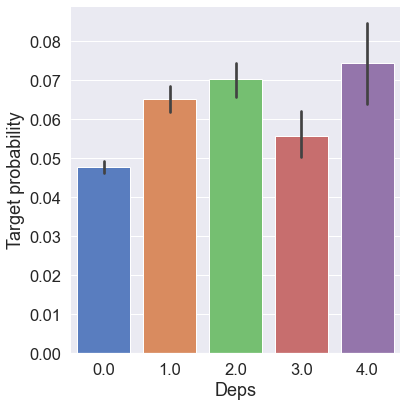

In [38]:
# Explore Deps feature quantiles vs Target
g = sns.catplot(x="Deps", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

## 4.2. Descriptive Statistics

In [39]:
dataset.describe() 

,id,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late6089,Deps
count,258640.000000,108640.000000,258640.000000,258640.000000,258640.000000,258640.000000,258640.000000,258640.000000,258640.000000,258640.000000,258640.000000,221140.000000
mean,67122.720701,0.054943,1.999985,1.956697,0.230432,1.999992,1.561932,1.910884,0.078542,1.004129,0.054651,0.717134
std,40198.081574,0.227870,1.414205,1.421675,0.675095,1.414216,1.680929,1.400870,0.428983,1.032327,0.289139,1.058444
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32903.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,65784.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,98672.000000,0.000000,3.000000,3.000000,0.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,4.000000,4.000000,6.000000,4.000000,4.000000,4.000000,5.000000,6.000000,3.000000,4.000000


## 4.3. Data Transformation (2): Building binary/dummy variables

In [40]:
dataset = pd.get_dummies(dataset, columns = ["UnsecLines"], prefix="UnsecLines")
dataset = pd.get_dummies(dataset, columns = ["age"], prefix="age")
dataset = pd.get_dummies(dataset, columns = ["Late3059"], prefix="Late3059")
dataset = pd.get_dummies(dataset, columns = ["DebtRatio"], prefix="DebtRatio")
dataset = pd.get_dummies(dataset, columns = ["MonthlyIncome"], prefix="MonthlyIncome")
dataset = pd.get_dummies(dataset, columns = ["OpenCredit"], prefix="OpenCredit")
dataset = pd.get_dummies(dataset, columns = ["Late90"], prefix="Late90")
dataset = pd.get_dummies(dataset, columns = ["PropLines"], prefix="PropLines")
dataset = pd.get_dummies(dataset, columns = ["Late6089"], prefix="Late6089")
dataset = pd.get_dummies(dataset, columns = ["Deps"], prefix="Deps")

Dataset with binary/dummy variables

In [41]:
dataset

,id,Target,UnsecLines_0,UnsecLines_1,UnsecLines_2,UnsecLines_3,UnsecLines_4,age_0,age_1,age_2,...,PropLines_6,Late6089_0,Late6089_1,Late6089_2,Late6089_3,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
0,1,1.0,0,0,0,0,1,0,1,0,...,1,1,0,0,0,0,0,1,0,0
1,2,0.0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,3,0.0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,4,0.0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,5,0.0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258635,149996,NaN,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
258636,149997,NaN,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
258637,149998,NaN,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
258638,149999,NaN,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


# 5. Finalize Model (Logistic Model)

## 5.1. Train/Test Split

In [42]:
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Target"],axis = 1,inplace=True)

C:\Users\gfan1\AppData\Local\Temp\ipykernel_22224\385251208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(labels=["Target"],axis = 1,inplace=True)


In [43]:
test.shape

(150000, 56)

In [44]:
#Separate train features and label 
train["Target"] = train["Target"].astype(int)

y_train = train["Target"]

X_train = train.drop(labels = ["Target", "id"],axis = 1)

C:\Users\gfan1\AppData\Local\Temp\ipykernel_22224\4033119369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Target"] = train["Target"].astype(int)


In [45]:
print(X_train.shape, y_train.shape)

(108640, 55) (108640,)


## 5.2. Set & Fit the Model

In [46]:
#Set the Model
LR = LogisticRegression()

#Fit the Model
LR.fit(X_train, y_train)

C:\Users\gfan1\anaconda3\envs\uconn_ml2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 5.3. Feature Selection

In [47]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = abs(LR.coef_[0])  # using absolute value since the coefficients can be negative
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<AxesSubplot:ylabel='feature'>

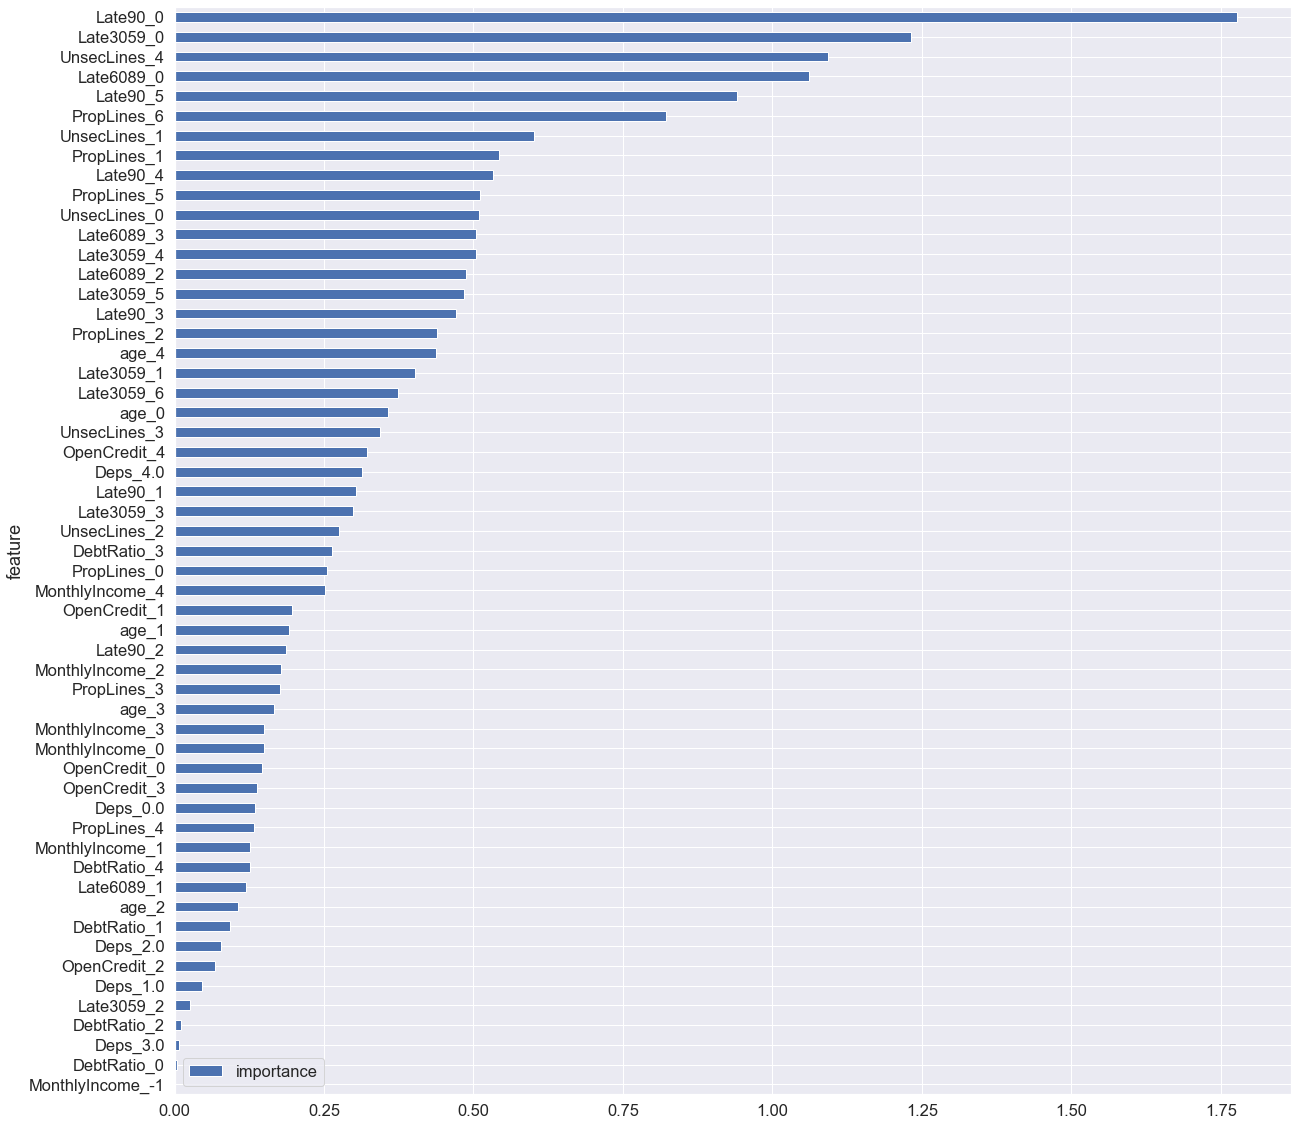

In [48]:
features.plot(kind='barh', figsize=(20, 20))

In [49]:
X_test = test.drop(labels = ["id"], axis = 1)

## 5.4. Use the Model to Make Predictions

### 5.4.1. Generation of y_predict (SeriousDlqin2yrs or Target)

In [50]:
y_predict = LR.predict(X_test)
print(y_predict)
print(type(y_predict))

[1 0 0 ... 0 0 0]
<class 'numpy.ndarray'>


### 5.4.2. Generation of Default Probability

The first column is the probability that the entry has the -1 label and the second column is the probability that the entry has the +1 label. Note that classes are ordered as they are in self.classes_.

If you would like to get the predicted probabilities for the positive label only, you can use logistic_model.predict_proba(data)[:,1].

In [51]:
DefaultProb = LR.predict_proba(X_test)[:, 1]
print(DefaultProb)
print(type(DefaultProb))

[0.58123968 0.09033622 0.33682043 ... 0.09682197 0.04086739 0.04900766]
<class 'numpy.ndarray'>


In [52]:
DP = pd.DataFrame(DefaultProb, columns=['Probability'])
DP

,Probability
0,0.581240
1,0.090336
2,0.336820
3,0.025300
4,0.094134
...,...
149995,0.209297
149996,0.022120
149997,0.096822
149998,0.040867


In [53]:
DP.describe()

,Probability
count,150000.000000
mean,0.071735
std,0.137384
min,0.003878
25%,0.012983
50%,0.024515
75%,0.062537
max,0.991016


## 5.5. Output the Data (File to Turn-in)

In [54]:
# Add a column "id"
id = {'id': list(range(1, 150001))}

Set up the required data form to turn-in

In [55]:
df = pd.DataFrame(id, columns=['id']).join(pd.DataFrame(DefaultProb, columns=['Probability']))

In [56]:
df

,id,Probability
0,1,0.581240
1,2,0.090336
2,3,0.336820
3,4,0.025300
4,5,0.094134
...,...,...
149995,149996,0.209297
149996,149997,0.022120
149997,149998,0.096822
149998,149999,0.040867


Export the data into csv file

In [57]:
#Export the data into csv file
df.to_csv('2UConnFNCE5352_CREDIT_SCORE.csv', index=False)

In [58]:
df.head(100)

,id,Probability
0,1,0.581240
1,2,0.090336
2,3,0.336820
3,4,0.025300
4,5,0.094134
...,...,...
95,96,0.009682
96,97,0.011557
97,98,0.081093
98,99,0.011266


In [59]:
df.describe()

,id,Probability
count,150000.000000,150000.000000
mean,75000.500000,0.071735
std,43301.414527,0.137384
min,1.000000,0.003878
25%,37500.750000,0.012983
50%,75000.500000,0.024515
75%,112500.250000,0.062537
max,150000.000000,0.991016
